In [3]:
# 0. INSTALACIÓN DE DEPENDENCIAS (ejecutar solo si es necesario)
%pip install pandas numpy matplotlib seaborn scipy -q

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# 📊 EDA Completo - clientes.csv

Este notebook realiza un **Análisis Exploratorio de Datos (EDA)** completo del archivo `clientes.csv`.

## Objetivos del análisis:
1. ✅ Identificar tipos y formatos de datos
2. ✅ Detectar valores nulos y duplicados
3. ✅ Encontrar valores atípicos (outliers)
4. ✅ Calcular estadísticas descriptivas: rango, media, mediana, moda, desviación estándar

In [ ]:
# 1. IMPORTAR LIBRERÍAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



# Configuración de visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
sns.set_style('whitegrid')

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


In [ ]:
# 2. CARGAR BASE DE DATOS
df = pd.read_csv('../clientes.csv')

#Para leer correctamente archivos Excel
#df=pd.read_excel(ruta, engine='openpyxl')

print("✅ Dataset cargado correctamente")
print(f"📏 Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas\n")

# Mostrar primeros registros
print("🔍 Primeros 5 registros:")
df.head()

✅ Dataset cargado correctamente
📏 Dimensiones: 100 filas × 5 columnas

🔍 Primeros 5 registros:


,id_cliente,nombre_cliente,email,ciudad,fecha_alta
0,1,Mariana Lopez,mariana.lopez@mail.com,Carlos Paz,2023-01-01
1,2,Nicolas Rojas,nicolas.rojas@mail.com,Carlos Paz,2023-01-02
2,3,Hernan Martinez,hernan.martinez@mail.com,Rio Cuarto,2023-01-03
3,4,Uma Martinez,uma.martinez@mail.com,Carlos Paz,2023-01-04
4,5,Agustina Flores,agustina.flores@mail.com,Cordoba,2023-01-05


## 📋 1. TIPOS Y FORMATOS DE DATOS

In [ ]:
# 3. INFORMACIÓN GENERAL - .info()
print("="*60)
print("📊 INFORMACIÓN GENERAL DEL DATASET")
print("="*60)
display(df.info())

print("\n" + "="*60)
print("📝 TIPOS DE DATOS POR COLUMNA")
print("="*60)
tipos_datos = pd.DataFrame({
    'Columna': df.columns,
    'Tipo de Dato': df.dtypes.values,
    'Tipo Python': [type(df[col].iloc[0]).__name__ if len(df) > 0 else 'N/A' for col in df.columns]
})
print(tipos_datos.to_string(index=False))

📊 INFORMACIÓN GENERAL DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_cliente      100 non-null    int64 
 1   nombre_cliente  100 non-null    object
 2   email           100 non-null    object
 3   ciudad          100 non-null    object
 4   fecha_alta      100 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.0+ KB

📝 TIPOS DE DATOS POR COLUMNA
       Columna Tipo de Dato Tipo Python
    id_cliente        int64       int64
nombre_cliente       object         str
         email       object         str
        ciudad       object         str
    fecha_alta       object         str


## 🔍 2. VALORES NULOS Y DUPLICADOS

In [7]:
# 4. ANÁLISIS DE VALORES NULOS
print("="*60)
print("🔍 ANÁLISIS DE VALORES NULOS")
print("="*60)

nulos = pd.DataFrame({
    'Columna': df.columns,
    'Valores Nulos': df.isnull().sum().values,
    'Porcentaje (%)': (df.isnull().sum().values / len(df) * 100).round(2)
})
print(nulos.to_string(index=False))

print(f"\n📊 Total de valores nulos en el dataset: {df.isnull().sum().sum()}")

# Visualización de nulos
if df.isnull().sum().sum() > 0:
    plt.figure(figsize=(10, 4))
    df.isnull().sum().plot(kind='bar', color='salmon')
    plt.title('Valores Nulos por Columna')
    plt.ylabel('Cantidad de Nulos')
    plt.xlabel('Columnas')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("✅ ¡No hay valores nulos en el dataset!")

🔍 ANÁLISIS DE VALORES NULOS
       Columna  Valores Nulos  Porcentaje (%)
    id_cliente              0             0.0
nombre_cliente              0             0.0
         email              0             0.0
        ciudad              0             0.0
    fecha_alta              0             0.0

📊 Total de valores nulos en el dataset: 0
✅ ¡No hay valores nulos en el dataset!


In [8]:
# 5. ANÁLISIS DE VALORES DUPLICADOS
print("="*60)
print("🔍 ANÁLISIS DE VALORES DUPLICADOS")
print("="*60)

duplicados_totales = df.duplicated().sum()
print(f"📊 Total de filas duplicadas: {duplicados_totales}")
print(f"📊 Porcentaje de duplicados: {(duplicados_totales/len(df)*100):.2f}%")

if duplicados_totales > 0:
    print(f"\n🔎 Filas duplicadas encontradas:")
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)))
else:
    print("✅ ¡No hay filas duplicadas en el dataset!")

# Verificar duplicados por columnas clave
print("\n" + "="*60)
print("🔑 DUPLICADOS POR COLUMNAS ESPECÍFICAS")
print("="*60)

for col in df.columns:
    dup_col = df[col].duplicated().sum()
    print(f"  • {col}: {dup_col} duplicados ({(dup_col/len(df)*100):.2f}%)")

🔍 ANÁLISIS DE VALORES DUPLICADOS
📊 Total de filas duplicadas: 0
📊 Porcentaje de duplicados: 0.00%
✅ ¡No hay filas duplicadas en el dataset!

🔑 DUPLICADOS POR COLUMNAS ESPECÍFICAS
  • id_cliente: 0 duplicados (0.00%)
  • nombre_cliente: 5 duplicados (5.00%)
  • email: 0 duplicados (0.00%)
  • ciudad: 94 duplicados (94.00%)
  • fecha_alta: 0 duplicados (0.00%)


## 📈 3. ESTADÍSTICAS DESCRIPTIVAS

In [9]:
# 6. ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS
print("="*60)
print("📊 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("="*60)

# Identificar columnas numéricas
numericas = df.select_dtypes(include=[np.number]).columns.tolist()

if len(numericas) > 0:
    print(f"Columnas numéricas encontradas: {numericas}\n")
    print(df[numericas].describe())
else:
    print("⚠️ No se encontraron columnas numéricas")
    print("💡 Verificando si hay columnas que podrían ser numéricas...")
    
    # Intentar convertir id_cliente a numérico para análisis
    if 'id_cliente' in df.columns:
        df['id_cliente_num'] = pd.to_numeric(df['id_cliente'], errors='coerce')
        numericas = ['id_cliente_num']
        print(f"\n✅ Columna 'id_cliente' convertida a numérica para análisis")
        print(df[numericas].describe())

📊 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS
Columnas numéricas encontradas: ['id_cliente']

       id_cliente
count  100.000000
mean    50.500000
std     29.011492
min      1.000000
25%     25.750000
50%     50.500000
75%     75.250000
max    100.000000


In [10]:
# 7. ESTADÍSTICAS DETALLADAS POR COLUMNA NUMÉRICA
print("\n" + "="*60)
print("📊 ESTADÍSTICAS DETALLADAS (RANGO, MEDIA, MEDIANA, MODA, DESV. EST.)")
print("="*60)

if len(numericas) > 0:
    for col in numericas:
        print(f"\n📌 Columna: {col}")
        print("-" * 50)
        
        datos = df[col].dropna()
        
        # Rango
        rango_min = datos.min()
        rango_max = datos.max()
        rango = rango_max - rango_min
        
        # Media
        media = datos.mean()
        
        # Mediana
        mediana = datos.median()
        
        # Moda
        moda = datos.mode()
        if len(moda) > 0:
            moda_valor = moda.iloc[0]
            moda_count = (datos == moda_valor).sum()
        else:
            moda_valor = "N/A"
            moda_count = 0
        
        # Desviación estándar
        desv_std = datos.std()
        
        # Mostrar resultados
        print(f"  🔹 Rango: [{rango_min:.2f}, {rango_max:.2f}] (amplitud: {rango:.2f})")
        print(f"  🔹 Media (promedio): {media:.2f}")
        print(f"  🔹 Mediana (valor central): {mediana:.2f}")
        print(f"  🔹 Moda (valor más frecuente): {moda_valor} (aparece {moda_count} veces)")
        print(f"  🔹 Desviación estándar: {desv_std:.2f}")
        print(f"  🔹 Varianza: {datos.var():.2f}")
        print(f"  🔹 Coeficiente de variación: {(desv_std/media*100):.2f}%")
else:
    print("⚠️ No hay columnas numéricas para analizar")


📊 ESTADÍSTICAS DETALLADAS (RANGO, MEDIA, MEDIANA, MODA, DESV. EST.)

📌 Columna: id_cliente
--------------------------------------------------
  🔹 Rango: [1.00, 100.00] (amplitud: 99.00)
  🔹 Media (promedio): 50.50
  🔹 Mediana (valor central): 50.50
  🔹 Moda (valor más frecuente): 1 (aparece 1 veces)
  🔹 Desviación estándar: 29.01
  🔹 Varianza: 841.67
  🔹 Coeficiente de variación: 57.45%


In [11]:
# 8. ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS (OBJETO)
print("\n" + "="*60)
print("📊 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS")
print("="*60)

categoricas = df.select_dtypes(include=['object']).columns.tolist()

if len(categoricas) > 0:
    print(f"Columnas categóricas encontradas: {categoricas}\n")
    print(df[categoricas].describe(include='object'))
    
    # Análisis detallado por columna categórica
    print("\n" + "="*60)
    print("📋 VALORES ÚNICOS Y FRECUENCIAS")
    print("="*60)
    
    for col in categoricas:
        print(f"\n📌 Columna: {col}")
        print("-" * 50)
        print(f"  🔹 Valores únicos: {df[col].nunique()}")
        print(f"  🔹 Valor más frecuente (moda): {df[col].mode().iloc[0] if len(df[col].mode()) > 0 else 'N/A'}")
        print(f"\n  📊 Top 10 valores más frecuentes:")
        print(df[col].value_counts().head(10).to_string())
else:
    print("⚠️ No se encontraron columnas categóricas")


📊 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS
Columnas categóricas encontradas: ['nombre_cliente', 'email', 'ciudad', 'fecha_alta']

       nombre_cliente                   email      ciudad  fecha_alta
count             100                     100         100         100
unique             95                     100           6         100
top      Bruno Castro  mariana.lopez@mail.com  Rio Cuarto  2023-01-01
freq                2                       1          23           1

📋 VALORES ÚNICOS Y FRECUENCIAS

📌 Columna: nombre_cliente
--------------------------------------------------
  🔹 Valores únicos: 95
  🔹 Valor más frecuente (moda): Agustina Martinez

  📊 Top 10 valores más frecuentes:
nombre_cliente
Bruno Castro         2
Karina Acosta        2
Elena Rodriguez      2
Olivia Perez         2
Agustina Martinez    2
Uma Martinez         1
Agustina Flores      1
Emilia Castro        1
Uma Medina           1
Yamila Molina        1

📌 Columna: email
----------------------------

## 🚨 4. DETECCIÓN DE VALORES ATÍPICOS (OUTLIERS)

In [12]:
# 9. DETECCIÓN DE OUTLIERS - MÉTODO IQR (Rango Intercuartílico)
print("="*60)
print("🚨 DETECCIÓN DE VALORES ATÍPICOS (OUTLIERS) - MÉTODO IQR")
print("="*60)

if len(numericas) > 0:
    for col in numericas:
        print(f"\n📌 Columna: {col}")
        print("-" * 50)
        
        datos = df[col].dropna()
        
        # Calcular cuartiles
        Q1 = datos.quantile(0.25)
        Q3 = datos.quantile(0.75)
        IQR = Q3 - Q1
        
        # Límites para outliers
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        
        # Detectar outliers
        outliers = datos[(datos < limite_inferior) | (datos > limite_superior)]
        
        print(f"  🔹 Q1 (25%): {Q1:.2f}")
        print(f"  🔹 Q3 (75%): {Q3:.2f}")
        print(f"  🔹 IQR (Rango Intercuartílico): {IQR:.2f}")
        print(f"  🔹 Límite inferior: {limite_inferior:.2f}")
        print(f"  🔹 Límite superior: {limite_superior:.2f}")
        print(f"  🔹 Cantidad de outliers: {len(outliers)} ({len(outliers)/len(datos)*100:.2f}%)")
        
        if len(outliers) > 0:
            print(f"  ⚠️ Valores atípicos detectados: {sorted(outliers.unique())[:10]}")
        else:
            print("  ✅ No se detectaron valores atípicos")
else:
    print("⚠️ No hay columnas numéricas para detectar outliers")

🚨 DETECCIÓN DE VALORES ATÍPICOS (OUTLIERS) - MÉTODO IQR

📌 Columna: id_cliente
--------------------------------------------------
  🔹 Q1 (25%): 25.75
  🔹 Q3 (75%): 75.25
  🔹 IQR (Rango Intercuartílico): 49.50
  🔹 Límite inferior: -48.50
  🔹 Límite superior: 149.50
  🔹 Cantidad de outliers: 0 (0.00%)
  ✅ No se detectaron valores atípicos


In [13]:
# 10. DETECCIÓN DE OUTLIERS - MÉTODO Z-SCORE
print("\n" + "="*60)
print("🚨 DETECCIÓN DE VALORES ATÍPICOS (OUTLIERS) - MÉTODO Z-SCORE")
print("="*60)
print("💡 Z-Score > 3 o < -3 se consideran outliers extremos")

if len(numericas) > 0:
    for col in numericas:
        print(f"\n📌 Columna: {col}")
        print("-" * 50)
        
        datos = df[col].dropna()
        
        # Calcular Z-Score
        z_scores = np.abs(stats.zscore(datos))
        
        # Outliers con umbral de 3
        outliers_z3 = datos[z_scores > 3]
        
        # Outliers con umbral de 2 (más estricto)
        outliers_z2 = datos[z_scores > 2]
        
        print(f"  🔹 Outliers extremos (|Z| > 3): {len(outliers_z3)} ({len(outliers_z3)/len(datos)*100:.2f}%)")
        print(f"  🔹 Outliers moderados (|Z| > 2): {len(outliers_z2)} ({len(outliers_z2)/len(datos)*100:.2f}%)")
        
        if len(outliers_z3) > 0:
            print(f"  ⚠️ Valores atípicos extremos: {sorted(outliers_z3.unique())[:10]}")
        else:
            print("  ✅ No se detectaron outliers extremos")
else:
    print("⚠️ No hay columnas numéricas para detectar outliers")


🚨 DETECCIÓN DE VALORES ATÍPICOS (OUTLIERS) - MÉTODO Z-SCORE
💡 Z-Score > 3 o < -3 se consideran outliers extremos

📌 Columna: id_cliente
--------------------------------------------------
  🔹 Outliers extremos (|Z| > 3): 0 (0.00%)
  🔹 Outliers moderados (|Z| > 2): 0 (0.00%)
  ✅ No se detectaron outliers extremos



📊 VISUALIZACIÓN DE OUTLIERS - BOXPLOT


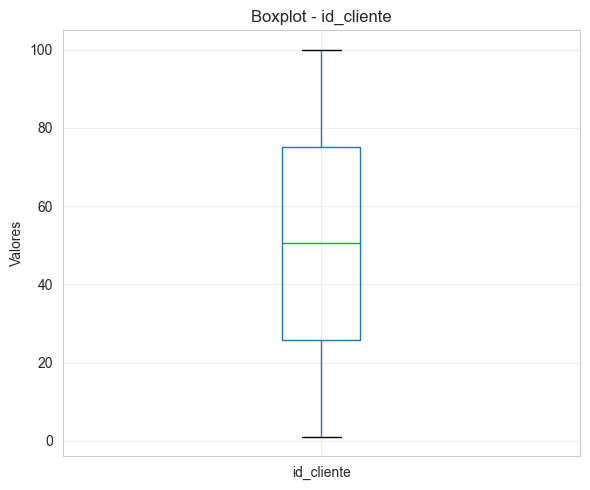

✅ Boxplot generado correctamente
💡 Los puntos fuera de los 'bigotes' son outliers potenciales


In [14]:
# 11. VISUALIZACIÓN DE OUTLIERS - BOXPLOT
print("\n" + "="*60)
print("📊 VISUALIZACIÓN DE OUTLIERS - BOXPLOT")
print("="*60)

if len(numericas) > 0:
    # Crear subplots para cada variable numérica
    fig, axes = plt.subplots(1, len(numericas), figsize=(6*len(numericas), 5))
    
    if len(numericas) == 1:
        axes = [axes]
    
    for idx, col in enumerate(numericas):
        df.boxplot(column=col, ax=axes[idx])
        axes[idx].set_title(f'Boxplot - {col}')
        axes[idx].set_ylabel('Valores')
        axes[idx].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Boxplot generado correctamente")
    print("💡 Los puntos fuera de los 'bigotes' son outliers potenciales")
else:
    print("⚠️ No hay columnas numéricas para visualizar")

## 📊 5. RESUMEN FINAL DEL EDA

In [15]:
# 12. RESUMEN FINAL DEL ANÁLISIS EXPLORATORIO
print("="*60)
print("📊 RESUMEN FINAL DEL EDA - clientes.csv")
print("="*60)

print(f"\n📏 DIMENSIONES DEL DATASET:")
print(f"  • Filas (registros): {df.shape[0]}")
print(f"  • Columnas (variables): {df.shape[1]}")
print(f"  • Total de celdas: {df.shape[0] * df.shape[1]}")

print(f"\n📋 TIPOS DE DATOS:")
print(f"  • Columnas numéricas: {len(numericas)}")
print(f"  • Columnas categóricas: {len(categoricas)}")

print(f"\n🔍 CALIDAD DE DATOS:")
print(f"  • Valores nulos totales: {df.isnull().sum().sum()}")
print(f"  • Filas duplicadas: {df.duplicated().sum()}")
print(f"  • Porcentaje de completitud: {((1 - df.isnull().sum().sum()/(df.shape[0]*df.shape[1]))*100):.2f}%")

if len(numericas) > 0:
    print(f"\n📈 ESTADÍSTICAS CLAVE (Variables Numéricas):")
    for col in numericas:
        datos = df[col].dropna()
        print(f"\n  📌 {col}:")
        print(f"     • Rango: [{datos.min():.2f}, {datos.max():.2f}]")
        print(f"     • Media: {datos.mean():.2f}")
        print(f"     • Mediana: {datos.median():.2f}")
        print(f"     • Desviación estándar: {datos.std():.2f}")

if len(categoricas) > 0:
    print(f"\n📋 VARIABLES CATEGÓRICAS:")
    for col in categoricas:
        print(f"  • {col}: {df[col].nunique()} valores únicos")

print("\n" + "="*60)
print("✅ ANÁLISIS EXPLORATORIO COMPLETADO")
print("="*60)

📊 RESUMEN FINAL DEL EDA - clientes.csv

📏 DIMENSIONES DEL DATASET:
  • Filas (registros): 100
  • Columnas (variables): 5
  • Total de celdas: 500

📋 TIPOS DE DATOS:
  • Columnas numéricas: 1
  • Columnas categóricas: 4

🔍 CALIDAD DE DATOS:
  • Valores nulos totales: 0
  • Filas duplicadas: 0
  • Porcentaje de completitud: 100.00%

📈 ESTADÍSTICAS CLAVE (Variables Numéricas):

  📌 id_cliente:
     • Rango: [1.00, 100.00]
     • Media: 50.50
     • Mediana: 50.50
     • Desviación estándar: 29.01

📋 VARIABLES CATEGÓRICAS:
  • nombre_cliente: 95 valores únicos
  • email: 100 valores únicos
  • ciudad: 6 valores únicos
  • fecha_alta: 100 valores únicos

✅ ANÁLISIS EXPLORATORIO COMPLETADO
